# Corporate Securites
## 1. BondHolders Vs. StockHolders
### Assume the total value of BondHolder Value is X
### Value of the firm is V(t) at time t in future
### Payoff Table:-       BondHolders      StockHolders
$$\begin{bmatrix} V(t)< X:- & V(t)  & 0 \\  V(t)>X:- & X & V(t)-X  \end{bmatrix}$$

### StockHolders :- Call Option with X as StrikePrice X
### BondHolders  :- Covered Call on the Total Value of the firm.

In [ ]:
function Option(OptionType,StrikePrice,StockPrice)
        if OptionType == "Call"
           PayOff = max(0,StockPrice - StrikePrice)
        elseif OptionType == "Put"
            PayOff = -min(0,StockPrice - StrikePrice)
        else print("Option Type Not Supported") 
        end
end

In [ ]:
StockPrice = collect(0:2:200)
using Plots
pyplot()

In [ ]:
StockHolders = Option.("Call",100,StockPrice)
ShortCall = -Option.("Call",100,StockPrice)
BondHolders = StockPrice + ShortCall


p  = plot(StockPrice,StockHolders,title = "Corporate Securities",label="StockHolders")
plot!(StockPrice,BondHolders,label = "BondHolders")
plot(p,layout = (1,1))

## 2. Callable Bonds 
### Aggregate face value of bonds - X
### Value of bonds anytime before expiration Xc
### Value of firm V
### Stockholder Payoff = V* - Xc (Before Expiration)
### Stockholder Payoff = V* - X  (At Expiration)

# Barrier Options

## The following Algorithm is to price European Style Down and Out Calls on a non-dividend paying Stock
### H is the Barrier Level

In [1]:
function BarrierOption(S,X,H,r,vol,t,n)
    u = exp(vol*(sqrt(t/n)))
    d = exp(-vol*(sqrt(t/n)))
    r1 = r*t/n
    R = exp(r1)
    p = (R-d)/(u-d)
    h = floor(Integer,log(H/S)/log(u))
    H = S*(u^h)
    C = zeros(Number,(n+1)) 
    for i in 1:n+1
        C[i] = max(0, S*(u^(n+1-i))*(d^(i-1)) - X)
    end
    if(((n+1)-h)%2 == 0 & (0<= (n+1-h)/2 <= n+1))
        C[Int((n+1-h)/2)+1] = 0
    end
    for j in n-1:-1:1
        for i in 1:j
            C[i] = (p*C[i]+(1-p)*C[i+1])/R
        end
        if(((j-h)%2 == 0) & (0<= (j-h)/2 <= j))
        C[Int((j-h)/2)+1] = 0  #Due to 1 based indexing in Julia
        end
    end
    return C[1]
end

BarrierOption (generic function with 1 method)

In [2]:
f1 = BarrierOption(100,120,90,0.1,0.25,1,5)

10.766537357553414

## Convergence of Binomial Tree for Down and out calls

In [3]:
n = 100:400

100:400

In [6]:
f2 = BarrierOption.(95,100,90,0.1,0.25,1,n)

301-element Array{Float64,1}:
 9.829737898124597 
 9.812002553203348 
 9.769514335687504 
 9.751303753811262 
 9.710465483885146 
 9.691833159798376 
 9.652554164418644 
 9.633548705550822 
 9.595744715135066 
 9.57641032498873  
 9.540002924043721 
 9.520379832205698 
 9.48529596516161  
 ⋮                 
 7.983956085085369 
 7.974460508551841 
 7.9699409524702665
 7.9605695569334625
 7.95600571058504  
 7.946756461935087 
 7.942149586630459 
 7.933020492545016 
 7.928371818224776 
 7.919360927132471 
 7.914671653232013 
 7.905777053311862 

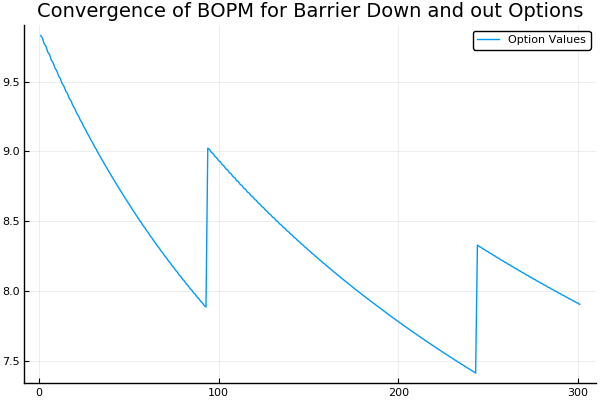

In [7]:
using Plots
pyplot()
p = plot(x = n,f2,title = "Convergence of BOPM for Barrier Down and out Options",label = "Option Values")
plot(p,layout = (1,1))